<a href="https://colab.research.google.com/github/Sid-9823/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <u>**Project Title : Netflix Movies and TV Shows Clustering**</u>
#####**Project Type** - Unsupervised

#####**Contribution** - Individual

#####**Individual name** - Siddhant Pal

#####**Cohort** - Berlin

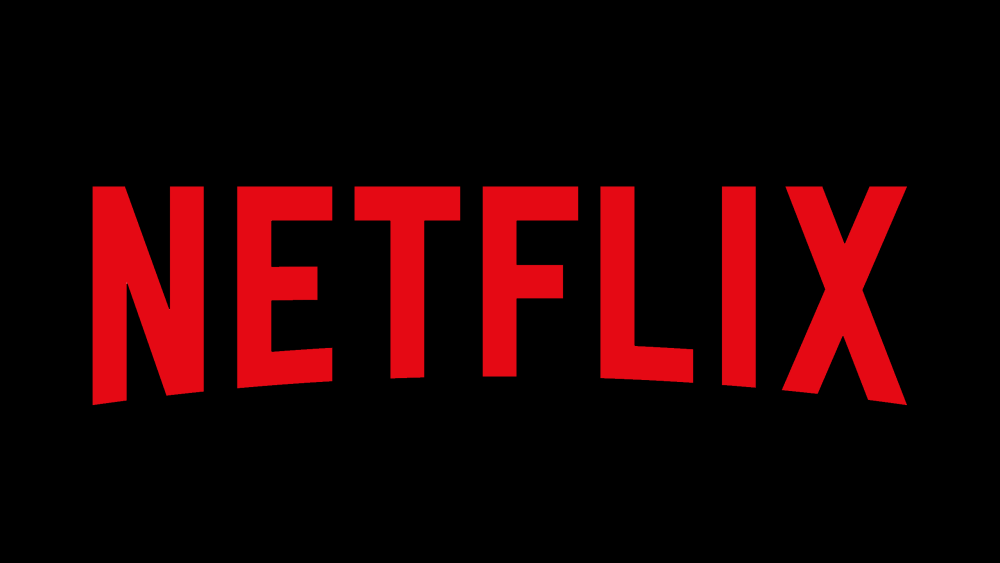

#**Project Summary**

#**GitHub Link**

https://github.com/Sid-9823/Netflix-Movies-and-TV-Shows-Clustering.git

#**Problem statement**

###**BUSINESS PROBLEM OVERVIEW**

**This dataset contains TV series and films that are currently accessible on Netflix as of 2019. The data was gathered through Flixable, a third-party Netflix search engine.**

**In 2018, they published an intriguing analysis revealing that the amount of TV series available on Netflix has almost tripled since 2010. Since 2010, the number of films on the streaming service has declined by almost 2,000 titles, while the number of TV episodes has almost tripled. It will be fascinating to see what additional insights can be extracted from the same information.**

**By matching text-based characteristics, we will cluster comparable material.**


### **Data Description**

**The dataset contains TV series and movies information such as show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in and description.**

**Feature's Information :**
* ***show_id*** : *Unique ID for every Movie / Tv Show.*

* ***type*** : *Identifier - A Movie or TV Show.*
* ***title*** : *Title of the movie / show.*
* ***Director*** : *Director of the show*
* ***cast*** : *Actors involved.*
* ***Country*** : *Country of production.*
* ***date_added*** : *Date it was added on Netflix.*
* ***release_year*** : *Actual release year of the show.*
* ***rating*** : *TV rating of the show.*
* ***duration*** : *Total duration in minutes or number of seasons.*
* ***listed_in*** : *Genre.*
* ***Description*** : *The summary description.*

#**Importing necessary libraries**

In [79]:
# Importing Numpy & Pandas for data processing & data wrangling.

import numpy as np
import pandas as pd

# Importing tools for visualization.

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for Hypothesis testing.

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library.

from wordcloud import WordCloud, STOPWORDS

# Libraries used for textual data preprocessing.

import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Libraries used for Clustering.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Libraries used for building recommendation system.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Data collection and analysis**

##**Data Loading and Basic Analysis**

In [155]:
# Loading the data from csv file to a pandas dataframe.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [156]:
# Printing first 5 rows.

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [157]:
 # Printing last 5 rows.

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [158]:
# Checking the number of rows and columns in our dataset.

df.shape

(7787, 12)

In [159]:
# Gathering information about our dataset such as null count values and data types involved.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [160]:
# Printing number of unique values in our dataset.

df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [161]:
# Checking null values.

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* ***As we can see there are missing values in director, cast, country, date_added and rating column in this dataframe.***

##**Data wrangling**

In [162]:
# Renaming our column's.

df = df.rename(columns={'show_id':'si','type':'typ','title':'tit','director':'dtr','cast':'cst','country':'cnt',
                        'date_added':'da','release_year':'ry','rating':'rtng','duration':'dur','listed_in':'li','description':'des'})

* ***Changing column's names as per our convenience as it becomes easier working with small feature names.***

In [163]:
# Handling Null values.

df['cst'].fillna(value = 'Unavailable',inplace = True)

df['cnt'].fillna(value = df['cnt'].mode()[0],inplace = True)

* ***In our 'Cast' column, we are filling our null cells with the 'Unavailable'.***

* ***In 'Country' column, we are filling out null cells with the mode of the column.***

In [164]:
# Dropping missing values.

df.dropna(subset = ['rtng','da'],inplace = True)

* ***Dropping missing values from 'rating' and 'date_added' column as there are very few null cells in these columns.***

In [165]:
# Dropping 'director' column.

df.drop(['dtr'],inplace = True, axis = 1)

* ***Dropping 'director' column as it's missing more than 30% values in it.***

In [166]:
# Checking for null values after handling them.

df.isnull().sum()

si      0
typ     0
tit     0
cst     0
cnt     0
da      0
ry      0
rtng    0
dur     0
li      0
des     0
dtype: int64

* ***As we can see, there are no null values present in our dataset now.***

# **Exploratory Data Analysis and Visualization**

**What is EDA ?**

***Exploratory Data Analysis can be considered as a process which is used to visualise data and it helps to uncover the underlying pattern and relations between the dependent and independent variable's which can be useful in decision making.***

**We are performing the Vizualization in  a structured way while following "UBM" Rule.**

**U - Univariate Analysis,**

**B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)**

**M - Multivariate Analysis**

##**Univariate Analysis**

***We can define a univariate analysis as the type of analysis in which single feature analysis is performed. This type of analysis is solely focused on the distribution and pattern of the datapoints in a dataset.***

###**Type**

Text(0.5, 1.0, 'Number of TV Shows and Movies in our dataset')

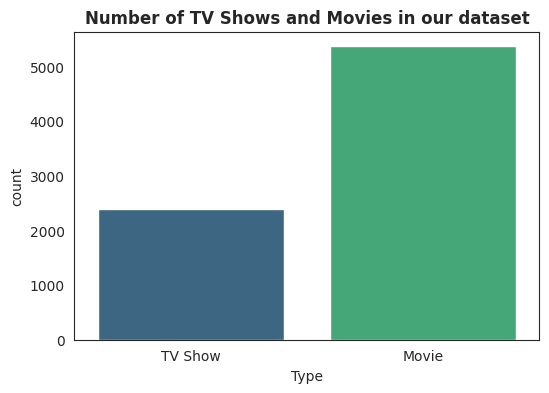

In [167]:
# Plotting a countplot for this column.

sns.set_style(style='white')
plt.figure(figsize=(6,4))
sns.countplot(x = df['typ'],palette='viridis')
plt.xlabel('Type')
plt.title('Number of TV Shows and Movies in our dataset',fontweight = 'bold')

* ***As we can see in the above countplot that there are more number of movies in our dataset as compared to TV shows.***

In [168]:
# Number of entries in each category.

df['typ'].value_counts()

Movie      5372
TV Show    2398
Name: typ, dtype: int64

* ***There are 5372 movies and 2398 TV shows present in our dataset.***

###**Country**

In [169]:
# Creating separate two variables for TV Shows and Movies.

mov = df[df['typ'] == 'Movie']

tv =  df[df['typ'] == 'TV Show']

Text(0.5, 1.0, 'Top 10 countries with highest number of movies on the platform')

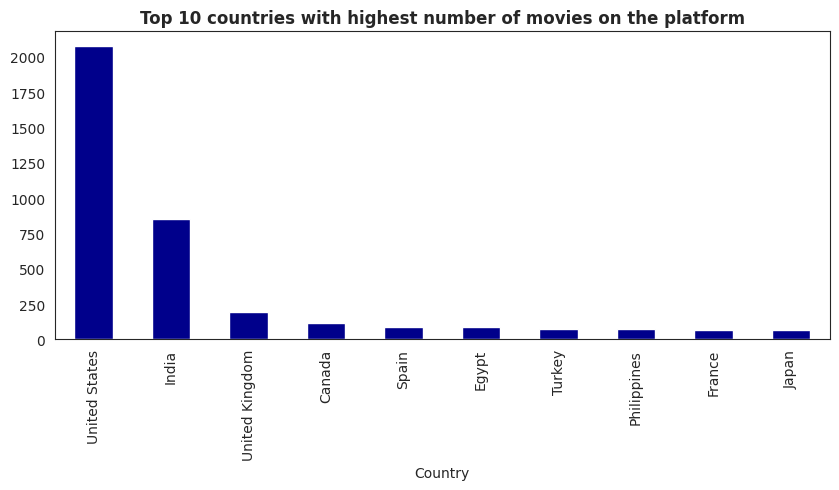

In [170]:
# Plotting a barplot.

plt.figure(figsize=(10,4))
mov['cnt'].value_counts().head(10).plot(kind = 'bar',color = 'darkblue')
plt.xlabel('Country')
plt.title('Top 10 countries with highest number of movies on the platform',fontweight = 'bold')

* ***United States has the highest number of Movies on Netflix followed by India, United Kingdom, Canada and several other countries.***

In [171]:
# Printing top 10 countries with highest number of movies.

mov['cnt'].value_counts().head(10)

United States     2076
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: cnt, dtype: int64

* ***There are 2076 movie title's of United States on netflix followed by India with 852 titles along with several other countries.***

Text(0.5, 1.0, 'Top 10 countries with highest number of TV shows on the platform')

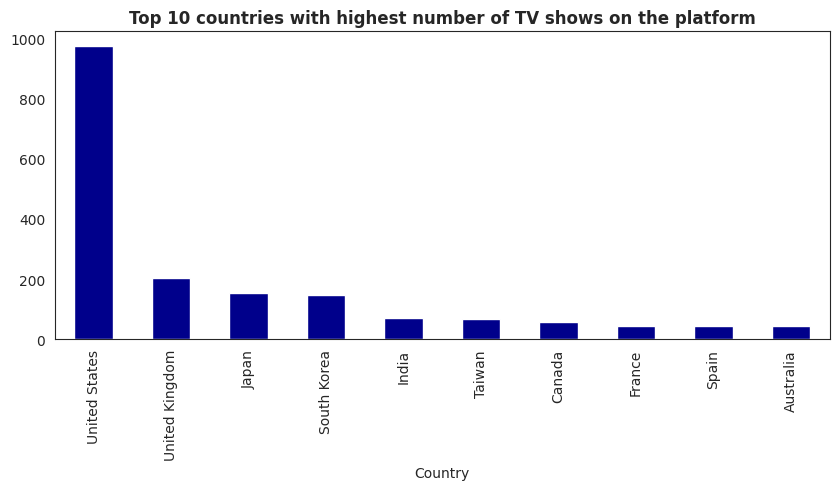

In [172]:
# Plotting a barplot.

plt.figure(figsize=(10,4))
tv['cnt'].value_counts().head(10).plot(kind = 'bar',color = 'darkblue')
plt.xlabel('Country')
plt.title('Top 10 countries with highest number of TV shows on the platform',fontweight = 'bold')

* ***United States still has the highest number of TV shows on Netflix followed by United Kingdom, Japan and several other countries.***

In [173]:
# Printing top 10 countries.

tv['cnt'].value_counts().head(10)

United States     975
United Kingdom    203
Japan             155
South Korea       147
India              71
Taiwan             68
Canada             59
France             46
Spain              45
Australia          44
Name: cnt, dtype: int64

* ***There are 975 TV shows of United States on netflix while followed by United Kingdom with 203 tv shows along with several other countries.***

###**Rating**

Text(0.5, 1.0, 'Different ratings of movies on the platform')

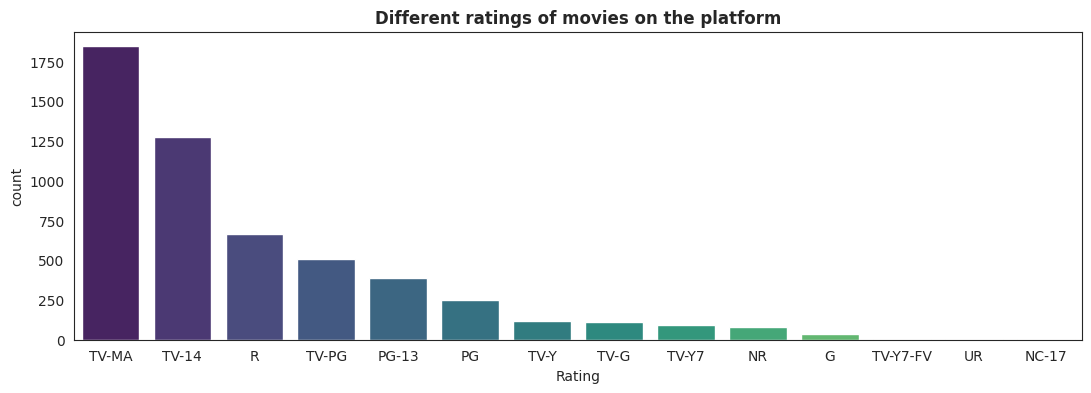

In [174]:
# Plotting a countplot.

plt.figure(figsize=(13,4))
sns.countplot(x = mov['rtng'], order = mov['rtng'].value_counts().index,palette = 'viridis')
plt.xlabel('Rating')
plt.title('Different ratings of movies on the platform',fontweight = 'bold')

* ***As we can observe by the above plot that majority of the movies on our platform is for TV - MA (Mature Audience) followed by TV - 14 (Content unsuitable for children under 14), R (Restricted to viewers over 17 years old) and several other categories.***

In [175]:
# Number of different entries.

mov['rtng'].value_counts()

TV-MA       1845
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rtng, dtype: int64

* ***There are 1845 movies of TV - MA rating followed by 1272 movies of TV - 14 rating with several other rating categories.***

Text(0.5, 1.0, 'Different ratings of TV Shows on the platform')

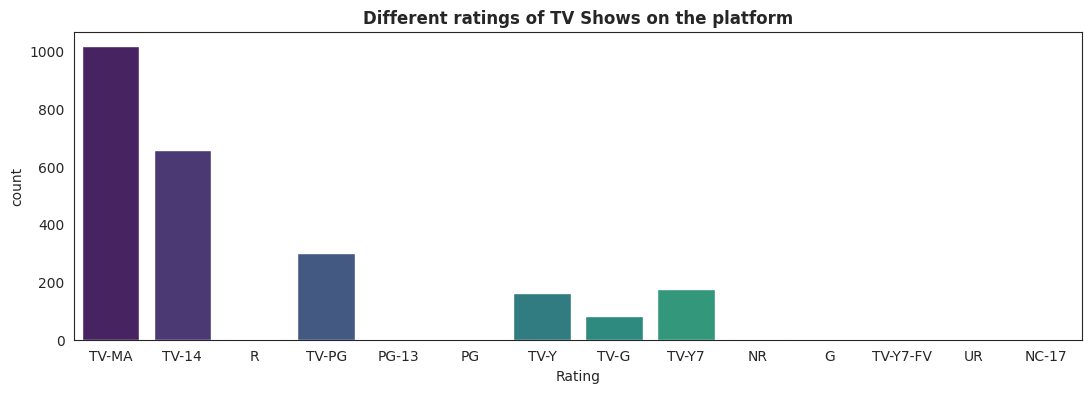

In [176]:
# Plotting a countplot.

plt.figure(figsize=(13,4))
sns.countplot(x = tv['rtng'], order = mov['rtng'].value_counts().index,palette = 'viridis')
plt.xlabel('Rating')
plt.title('Different ratings of TV Shows on the platform',fontweight = 'bold')

* ***TV Shows are also rated similar as the movies on the platform.***

In [177]:
# Number of different entries.

tv['rtng'].value_counts()

TV-MA       1016
TV-14        656
TV-PG        299
TV-Y7        175
TV-Y         162
TV-G          83
NR             4
R              2
TV-Y7-FV       1
Name: rtng, dtype: int64

* ***There are 1016 TV Shows of TV - MA rating followed by 656 TV Shows of TV - 14 rating with several other rating categories.***

###**Duration**

Text(0.5, 1.0, 'Distribution of Movies duration (minutes)')

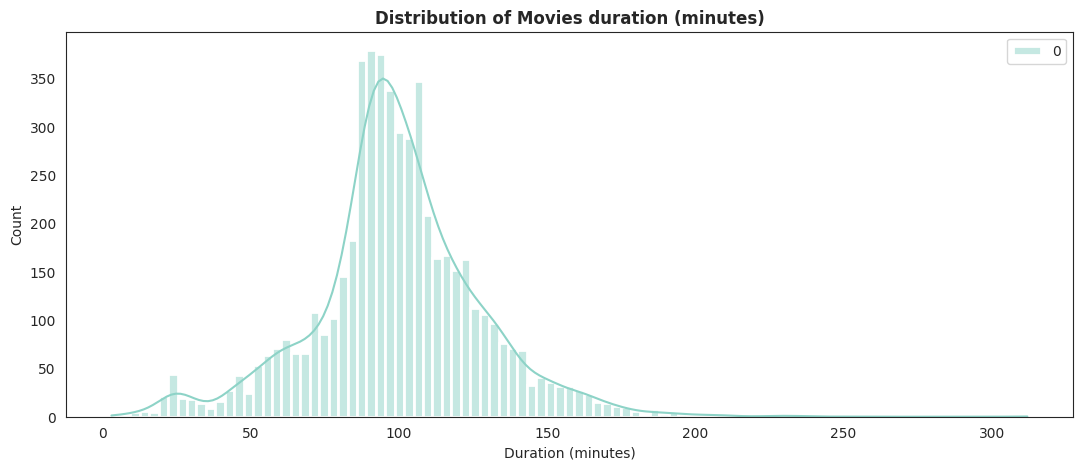

In [178]:
# Plotting a distribution plot.

plt.figure(figsize=(13,5))
sns.histplot(mov['dur'].str.extract('(\d+)').astype(int), kde = True, linewidth=2) # It is extracting digits from the mov['dur'] and plotting it.
plt.xlabel('Duration (minutes)')
plt.title('Distribution of Movies duration (minutes)', fontweight = 'bold')

* ***As we can observe in above distplot that it is following a near normal distribution.***

* ***It also means that majority of movies on the platform are of about 1.5 hr duration and can go upto 2.5 to 3 hr if max duration considered.***

Text(0.5, 1.0, 'Duration of TV shows (seasons)')

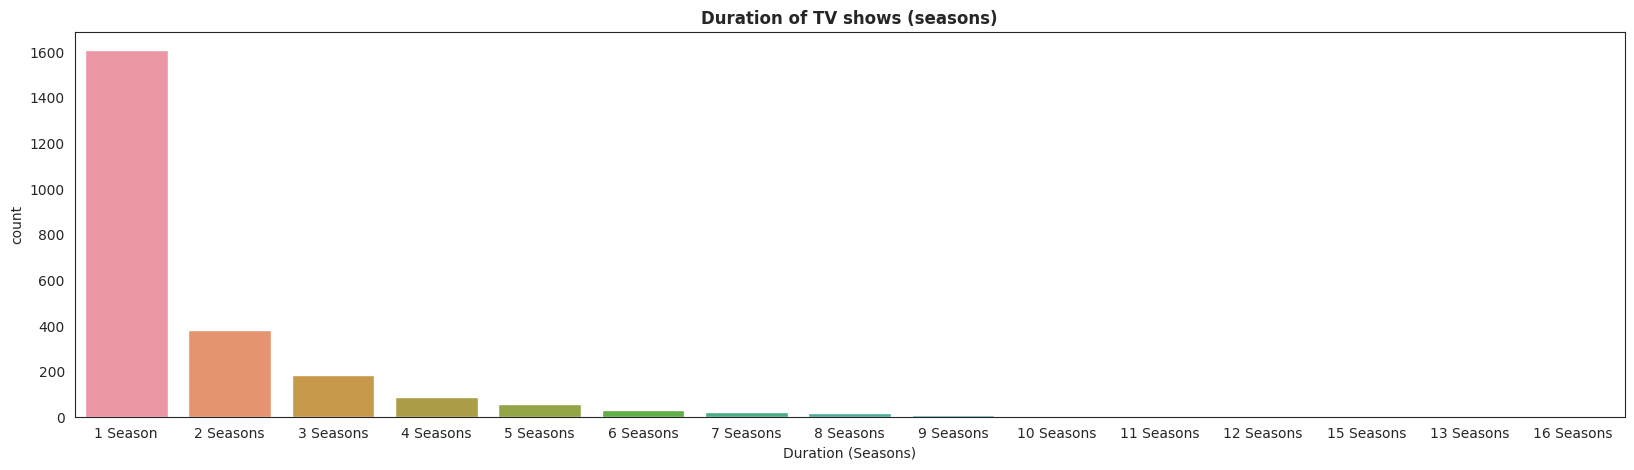

In [179]:
# Plotting a countplot.

plt.figure(figsize = (20,5))
sns.countplot(x = tv['dur'], order = tv['dur'].value_counts().index)
plt.xlabel('Duration (Seasons)')
plt.title('Duration of TV shows (seasons)', fontweight = 'bold')

* ***Majority of TV Shows consist of 1 season on the platform while rest consist of 2 to 8 seasons.***

In [180]:
# Printing number of seasons.

tv['dur'].value_counts()

1 Season      1606
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
12 Seasons       2
15 Seasons       2
13 Seasons       1
16 Seasons       1
Name: dur, dtype: int64

* ***There are 1606 TV shows of 1 season and 378 TV shows of 2 seasons following few other TV shows ranging upto 3 to 10 seasons.***

In [181]:
df.head()

,si,typ,tit,cst,cnt,da,ry,rtng,dur,li,des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


###**Release year**

Text(0.5, 1.0, 'Top 10 years in which highest movies were released')

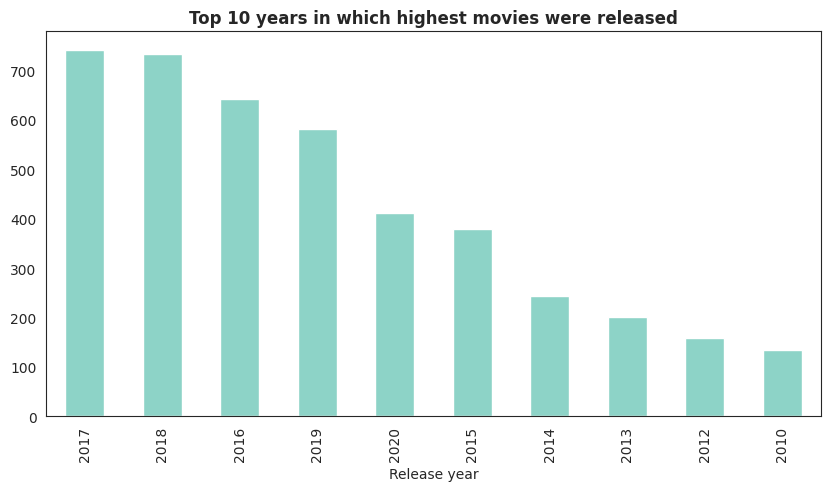

In [182]:
plt.figure(figsize=(10,5))
mov['ry'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Release year')
plt.title('Top 10 years in which highest movies were released', fontweight = 'bold')